Kaggle 3: https://www.kaggle.com/code/esratmaria/music-genre-recognition

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
data = pd.read_csv("../feature_extraction/dataForHarmonicAudio.csv",usecols=lambda column: column != 'filename')

In [3]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dfWithGenresMappedToInts = data.copy()  # Create a copy of the original DataFrame
dfWithGenresMappedToInts['genre'] = dfWithGenresMappedToInts['genre'].map(mappingGenresToIntegers)

dfWithGenresMappedToInts.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [ ]:
y = pd.get_dummies(Y)

In [41]:
X = dfWithGenresMappedToInts.iloc[:, :-1] 
y = dfWithGenresMappedToInts.iloc[:, -1]
y = pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
!pip install tensorflow

In [44]:
import tensorflow

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend, Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D

from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(20, (5, 5), activation="relu", strides=1, padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50, (5, 5), use_bias=50))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Use softmax for multi-class classification

/Users/sayantanj/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=['accuracy'])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)

history = model.fit(X_train, y_train, epochs=90, batch_size=64, validation_data= (X_test, y_test), callbacks=[early_stopping])

Epoch 1/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1278 - loss: 2.4312 - val_accuracy: 0.1267 - val_loss: 2.4362
Epoch 2/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1417 - loss: 2.4205 - val_accuracy: 0.1333 - val_loss: 2.4290
Epoch 3/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1513 - loss: 2.3756 - val_accuracy: 0.1333 - val_loss: 2.4218
Epoch 4/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1587 - loss: 2.3921 - val_accuracy: 0.1267 - val_loss: 2.4144
Epoch 5/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1241 - loss: 2.3999 - val_accuracy: 0.1267 - val_loss: 2.4073
Epoch 6/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1481 - loss: 2.3656 - val_accuracy: 0.1267 - val_loss: 2.4007
Epoch 7/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1757 - loss: 2.3508 - val_accuracy: 0.1267 - val_loss: 2.3938
Epoch 8/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1746 - loss: 2.3386 - val_accuracy: 0.1333 - val_loss:

Epoch 52/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2473 - loss: 2.0869 - val_accuracy: 0.2333 - val_loss: 2.1330
Epoch 53/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2783 - loss: 2.0714 - val_accuracy: 0.2400 - val_loss: 2.1283
Epoch 54/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2410 - loss: 2.0846 - val_accuracy: 0.2400 - val_loss: 2.1236
Epoch 55/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2744 - loss: 2.0660 - val_accuracy: 0.2400 - val_loss: 2.1188
Epoch 56/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2685 - loss: 2.0682 - val_accuracy: 0.2467 - val_loss: 2.1141
Epoch 57/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 2.0698 - val_accuracy: 0.2533 - val_loss: 2.1091
Epoch 58/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2648 - loss: 2.0752 - val_accuracy: 0.2533 - val_loss: 2.1044
Epoch 59/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3008 - loss: 2.0441 - val_accuracy: 0.2533 - v

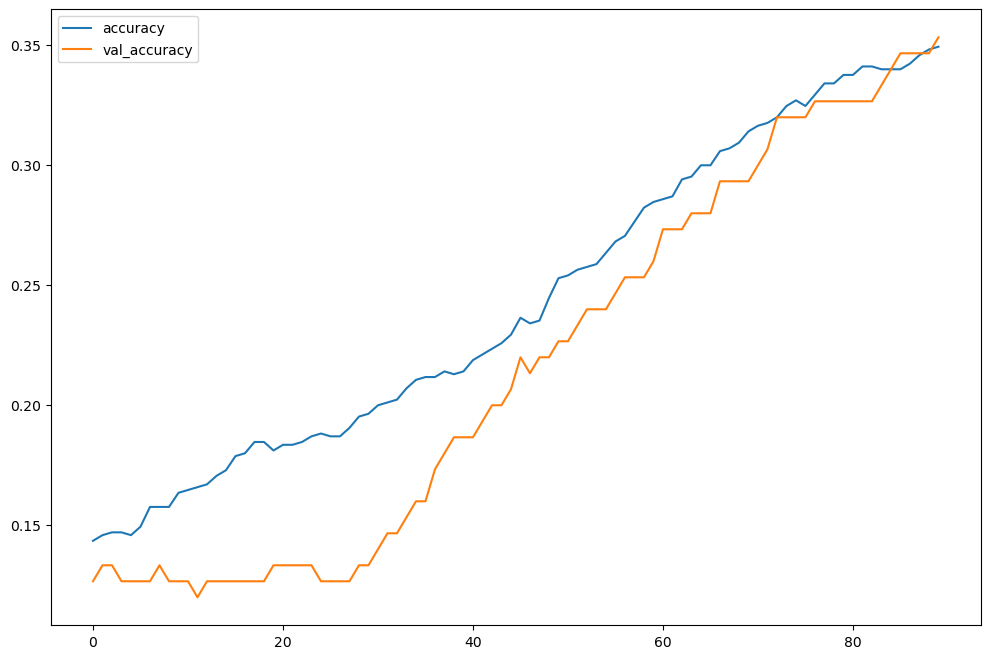

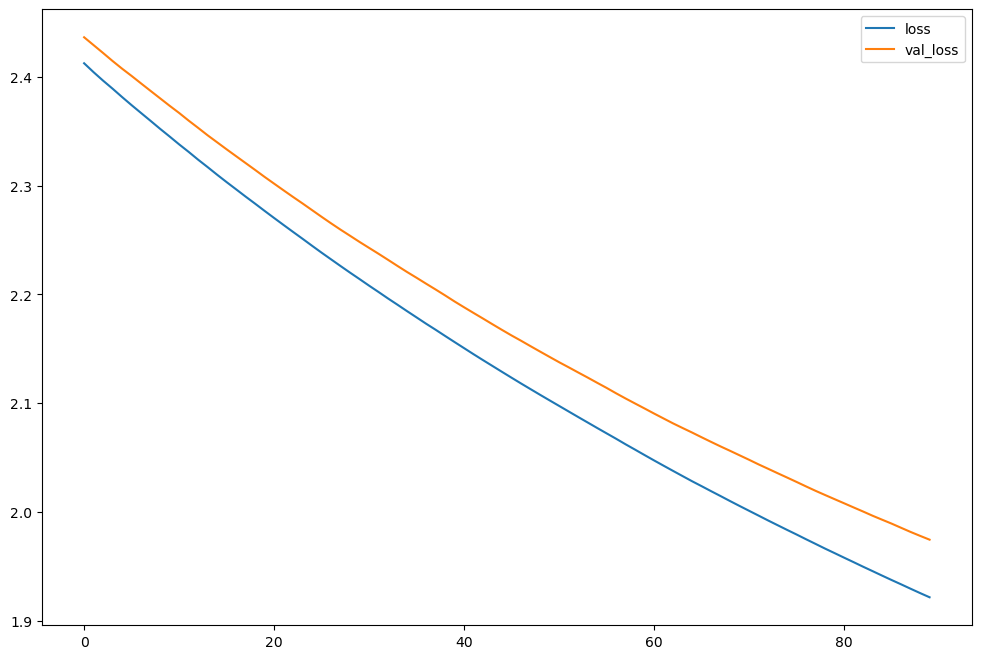

27/27 - 0s - 721us/step - accuracy: 0.3506 - loss: 1.9193
5/5 - 0s - 2ms/step - accuracy: 0.3533 - loss: 1.9746
Training accuracy: 0.35058823227882385
Test accuracy: 0.35333332419395447


In [48]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()
train_loss, train_acc = model.evaluate(X_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print('Training accuracy:', train_acc)
print('Test accuracy:', test_acc)

Next model

In [92]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [58]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(32, kernel_size=(3, 1), use_bias=50))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

/Users/sayantanj/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 42, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 21, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 19, 1, 32)      │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 9, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,786 (311.66 KB)

 Trainable params: 79,786 (311.66 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=['accuracy'])

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)

history = model.fit(X_train, y_train, epochs=90, batch_size=64, validation_data= (X_test, y_test), callbacks=[early_stopping])

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3817 - loss: 1.7697 - val_accuracy: 0.4067 - val_loss: 1.7167
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3973 - loss: 1.7402 - val_accuracy: 0.4133 - val_loss: 1.7130
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4065 - loss: 1.7377 - val_accuracy: 0.4200 - val_loss: 1.7092
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3729 - loss: 1.7530 - val_accuracy: 0.4200 - val_loss: 1.7054
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4048 - loss: 1.7275 - val_accuracy: 0.4200 - val_loss: 1.7020
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4028 - loss: 1.7110 - val_accuracy: 0.4200 - val_loss: 1.6982
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4066 - loss: 1.6980 - val_accuracy: 0.4200 - val_loss: 1.6950
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4321 - loss: 1.6909 - val_accuracy: 0.4267 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4925 - loss: 1.4899 - val_accuracy: 0.5200 - val_loss: 1.4854
Epoch 102/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5191 - loss: 1.4307 - val_accuracy: 0.5200 - val_loss: 1.4841
Epoch 103/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5016 - loss: 1.4434 - val_accuracy: 0.5200 - val_loss: 1.4827
Epoch 104/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5060 - loss: 1.4439 - val_accuracy: 0.5200 - val_loss: 1.4812
Epoch 105/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4974 - loss: 1.4619 - val_accuracy: 0.5200 - val_loss: 1.4798
Epoch 106/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5128 - loss: 1.4430 - val_accuracy: 0.5200 - val_loss: 1.4782
Epoch 107/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5076 - loss: 1.4536 - val_accuracy: 0.5133 - val_loss: 1.4770
Epoch 108/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5164 - loss: 1.4505 - val_accuracy: 0.5133 -

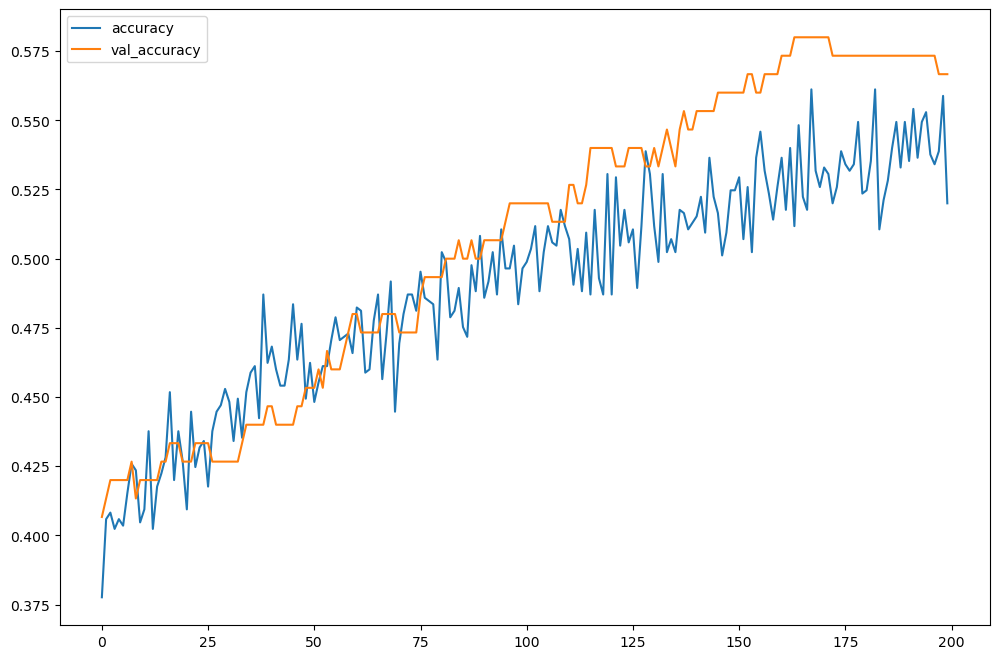

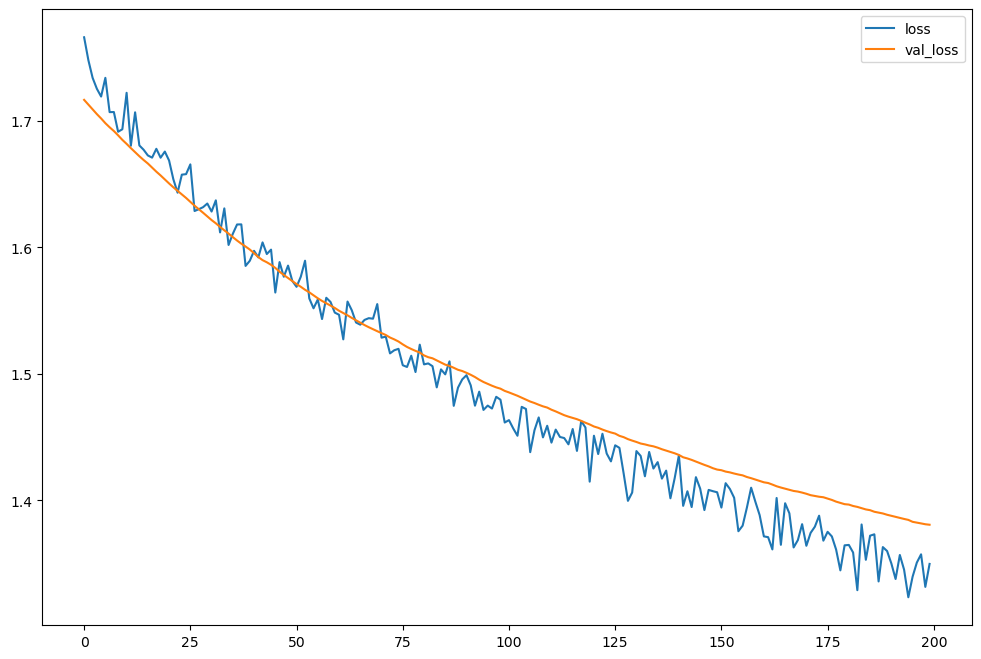

27/27 - 0s - 1ms/step - accuracy: 0.6059 - loss: 1.2701
5/5 - 0s - 3ms/step - accuracy: 0.5667 - loss: 1.3808
Training accuracy: 0.6058823466300964
Test accuracy: 0.5666666626930237


In [63]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()
train_loss, train_acc = model.evaluate(X_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print('Training accuracy:', train_acc)
print('Test accuracy:', test_acc)

In [64]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)

history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data= (X_test, y_test), callbacks=[early_stopping])

Epoch 1/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5698 - loss: 1.3493 - val_accuracy: 0.5667 - val_loss: 1.3801
Epoch 2/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5290 - loss: 1.3573 - val_accuracy: 0.5667 - val_loss: 1.3797
Epoch 3/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5148 - loss: 1.3511 - val_accuracy: 0.5667 - val_loss: 1.3790
Epoch 4/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5198 - loss: 1.3478 - val_accuracy: 0.5667 - val_loss: 1.3777
Epoch 5/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5535 - loss: 1.3344 - val_accuracy: 0.5667 - val_loss: 1.3767
Epoch 6/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5448 - loss: 1.3328 - val_accuracy: 0.5667 - val_loss: 1.3758
Epoch 7/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5007 - loss: 1.3601 - val_accuracy: 0.5667 - val_loss: 1.3746
Epoch 8/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5444 - loss: 1.3492 - val_accuracy: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5816 - loss: 1.2288 - val_accuracy: 0.5800 - val_loss: 1.3125
Epoch 102/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5485 - loss: 1.2541 - val_accuracy: 0.5667 - val_loss: 1.3119
Epoch 103/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5749 - loss: 1.2651 - val_accuracy: 0.5667 - val_loss: 1.3114
Epoch 104/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5687 - loss: 1.2166 - val_accuracy: 0.5667 - val_loss: 1.3114
Epoch 105/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5625 - loss: 1.2671 - val_accuracy: 0.5667 - val_loss: 1.3109
Epoch 106/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5640 - loss: 1.2553 - val_accuracy: 0.5733 - val_loss: 1.3103
Epoch 107/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5886 - loss: 1.2212 - val_accuracy: 0.5667 - val_loss: 1.3097
Epoch 108/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5812 - loss: 1.2490 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6167 - loss: 1.2216 - val_accuracy: 0.5800 - val_loss: 1.2871
Epoch 152/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5710 - loss: 1.2251 - val_accuracy: 0.5800 - val_loss: 1.2861
Epoch 153/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5437 - loss: 1.2693 - val_accuracy: 0.5867 - val_loss: 1.2850
Epoch 154/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5934 - loss: 1.1971 - val_accuracy: 0.5867 - val_loss: 1.2846
Epoch 155/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5602 - loss: 1.2071 - val_accuracy: 0.5867 - val_loss: 1.2838
Epoch 156/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5821 - loss: 1.2316 - val_accuracy: 0.5867 - val_loss: 1.2829
Epoch 157/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5949 - loss: 1.2083 - val_accuracy: 0.5867 - val_loss: 1.2823
Epoch 158/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5960 - loss: 1.2190 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5881 - loss: 1.1777 - val_accuracy: 0.5867 - val_loss: 1.2620
Epoch 202/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5895 - loss: 1.1812 - val_accuracy: 0.5867 - val_loss: 1.2612
Epoch 203/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5912 - loss: 1.2111 - val_accuracy: 0.5867 - val_loss: 1.2602
Epoch 204/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5908 - loss: 1.1633 - val_accuracy: 0.5867 - val_loss: 1.2595
Epoch 205/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5877 - loss: 1.2385 - val_accuracy: 0.5867 - val_loss: 1.2591
Epoch 206/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6037 - loss: 1.1649 - val_accuracy: 0.5867 - val_loss: 1.2588
Epoch 207/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5705 - loss: 1.1971 - val_accuracy: 0.5867 - val_loss: 1.2587
Epoch 208/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5840 - loss: 1.1949 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6443 - loss: 1.0954 - val_accuracy: 0.6067 - val_loss: 1.2418
Epoch 252/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6180 - loss: 1.1469 - val_accuracy: 0.6067 - val_loss: 1.2416
Epoch 253/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5998 - loss: 1.1280 - val_accuracy: 0.6133 - val_loss: 1.2413
Epoch 254/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6034 - loss: 1.1374 - val_accuracy: 0.6067 - val_loss: 1.2405
Epoch 255/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5907 - loss: 1.1342 - val_accuracy: 0.6067 - val_loss: 1.2399
Epoch 256/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5982 - loss: 1.1318 - val_accuracy: 0.6067 - val_loss: 1.2394
Epoch 257/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6020 - loss: 1.1588 - val_accuracy: 0.6067 - val_loss: 1.2386
Epoch 258/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6128 - loss: 1.1216 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6163 - loss: 1.1263 - val_accuracy: 0.6133 - val_loss: 1.2228
Epoch 302/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5859 - loss: 1.1539 - val_accuracy: 0.6133 - val_loss: 1.2233
Epoch 303/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6222 - loss: 1.1111 - val_accuracy: 0.6133 - val_loss: 1.2234
Epoch 304/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6014 - loss: 1.0956 - val_accuracy: 0.6133 - val_loss: 1.2228
Epoch 305/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5763 - loss: 1.1421 - val_accuracy: 0.6133 - val_loss: 1.2221
Epoch 306/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6008 - loss: 1.1386 - val_accuracy: 0.6133 - val_loss: 1.2221
Epoch 307/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5979 - loss: 1.1438 - val_accuracy: 0.6067 - val_loss: 1.2217
Epoch 308/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5956 - loss: 1.1532 - val_accuracy: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6239 - loss: 1.0790 - val_accuracy: 0.6067 - val_loss: 1.2068
Epoch 352/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 1.0489 - val_accuracy: 0.6067 - val_loss: 1.2063
Epoch 353/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6479 - loss: 1.0676 - val_accuracy: 0.6067 - val_loss: 1.2064
Epoch 354/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6139 - loss: 1.1493 - val_accuracy: 0.6067 - val_loss: 1.2059
Epoch 355/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 1.0758 - val_accuracy: 0.6067 - val_loss: 1.2058
Epoch 356/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6480 - loss: 1.0621 - val_accuracy: 0.6067 - val_loss: 1.2055
Epoch 357/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6290 - loss: 1.0722 - val_accuracy: 0.6067 - val_loss: 1.2048
Epoch 358/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6144 - loss: 1.1050 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6368 - loss: 1.0713 - val_accuracy: 0.6133 - val_loss: 1.1903
Epoch 402/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6467 - loss: 1.0348 - val_accuracy: 0.6133 - val_loss: 1.1889
Epoch 403/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6025 - loss: 1.0977 - val_accuracy: 0.6133 - val_loss: 1.1886
Epoch 404/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6092 - loss: 1.1316 - val_accuracy: 0.6133 - val_loss: 1.1885
Epoch 405/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6235 - loss: 1.1181 - val_accuracy: 0.6133 - val_loss: 1.1881
Epoch 406/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6082 - loss: 1.1117 - val_accuracy: 0.6133 - val_loss: 1.1875
Epoch 407/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6349 - loss: 1.0568 - val_accuracy: 0.6200 - val_loss: 1.1875
Epoch 408/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6367 - loss: 1.0588 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6367 - loss: 1.0535 - val_accuracy: 0.6200 - val_loss: 1.1771
Epoch 452/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6313 - loss: 1.0861 - val_accuracy: 0.6200 - val_loss: 1.1768
Epoch 453/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6394 - loss: 1.0409 - val_accuracy: 0.6200 - val_loss: 1.1764
Epoch 454/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6394 - loss: 1.0550 - val_accuracy: 0.6200 - val_loss: 1.1764
Epoch 455/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6239 - loss: 1.0528 - val_accuracy: 0.6200 - val_loss: 1.1765
Epoch 456/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6315 - loss: 1.0745 - val_accuracy: 0.6067 - val_loss: 1.1763
Epoch 457/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6497 - loss: 1.0313 - val_accuracy: 0.6067 - val_loss: 1.1763
Epoch 458/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6766 - loss: 1.0088 - val_accuracy: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6122 - loss: 1.0472 - val_accuracy: 0.6133 - val_loss: 1.1622
Epoch 502/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6470 - loss: 1.0499 - val_accuracy: 0.6133 - val_loss: 1.1621
Epoch 503/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6469 - loss: 1.0353 - val_accuracy: 0.6200 - val_loss: 1.1623
Epoch 504/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6534 - loss: 1.0315 - val_accuracy: 0.6133 - val_loss: 1.1619
Epoch 505/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6691 - loss: 1.0212 - val_accuracy: 0.6133 - val_loss: 1.1617
Epoch 506/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6505 - loss: 1.0196 - val_accuracy: 0.6133 - val_loss: 1.1614
Epoch 507/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6591 - loss: 0.9857 - val_accuracy: 0.6133 - val_loss: 1.1612
Epoch 508/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6650 - loss: 0.9607 - val_accuracy: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6301 - loss: 1.0415 - val_accuracy: 0.6200 - val_loss: 1.1511
Epoch 552/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6791 - loss: 0.9744 - val_accuracy: 0.6200 - val_loss: 1.1514
Epoch 553/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6530 - loss: 1.0084 - val_accuracy: 0.6200 - val_loss: 1.1517
Epoch 554/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6681 - loss: 0.9586 - val_accuracy: 0.6200 - val_loss: 1.1512
Epoch 555/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6170 - loss: 1.0604 - val_accuracy: 0.6200 - val_loss: 1.1507
Epoch 556/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6622 - loss: 0.9926 - val_accuracy: 0.6200 - val_loss: 1.1510
Epoch 557/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6451 - loss: 0.9812 - val_accuracy: 0.6200 - val_loss: 1.1510
Epoch 558/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6271 - loss: 1.0667 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6515 - loss: 1.0133 - val_accuracy: 0.6267 - val_loss: 1.1424
Epoch 602/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6218 - loss: 1.0176 - val_accuracy: 0.6200 - val_loss: 1.1424
Epoch 603/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.9800 - val_accuracy: 0.6200 - val_loss: 1.1418
Epoch 604/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6647 - loss: 0.9728 - val_accuracy: 0.6200 - val_loss: 1.1416
Epoch 605/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6533 - loss: 1.0077 - val_accuracy: 0.6200 - val_loss: 1.1417
Epoch 606/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6474 - loss: 0.9742 - val_accuracy: 0.6267 - val_loss: 1.1416
Epoch 607/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6555 - loss: 0.9573 - val_accuracy: 0.6200 - val_loss: 1.1412
Epoch 608/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6307 - loss: 1.0319 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6478 - loss: 1.0205 - val_accuracy: 0.6200 - val_loss: 1.1311
Epoch 652/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6962 - loss: 0.9349 - val_accuracy: 0.6200 - val_loss: 1.1311
Epoch 653/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6914 - loss: 0.9245 - val_accuracy: 0.6200 - val_loss: 1.1307
Epoch 654/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6694 - loss: 0.9617 - val_accuracy: 0.6200 - val_loss: 1.1305
Epoch 655/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6542 - loss: 0.9850 - val_accuracy: 0.6200 - val_loss: 1.1303
Epoch 656/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6461 - loss: 0.9687 - val_accuracy: 0.6200 - val_loss: 1.1304
Epoch 657/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6670 - loss: 0.9545 - val_accuracy: 0.6200 - val_loss: 1.1301
Epoch 658/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6429 - loss: 1.0038 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6999 - loss: 0.8932 - val_accuracy: 0.6200 - val_loss: 1.1214
Epoch 702/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6593 - loss: 0.9749 - val_accuracy: 0.6200 - val_loss: 1.1221
Epoch 703/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6761 - loss: 0.9861 - val_accuracy: 0.6200 - val_loss: 1.1220
Epoch 704/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6637 - loss: 0.9901 - val_accuracy: 0.6200 - val_loss: 1.1217
Epoch 705/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6959 - loss: 0.9328 - val_accuracy: 0.6200 - val_loss: 1.1213
Epoch 706/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6721 - loss: 0.9548 - val_accuracy: 0.6200 - val_loss: 1.1212
Epoch 707/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6529 - loss: 0.9814 - val_accuracy: 0.6200 - val_loss: 1.1207
Epoch 708/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6687 - loss: 0.9724 - val_accuracy: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6708 - loss: 0.9565 - val_accuracy: 0.6133 - val_loss: 1.1145
Epoch 752/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6677 - loss: 0.9583 - val_accuracy: 0.6133 - val_loss: 1.1142
Epoch 753/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7135 - loss: 0.8677 - val_accuracy: 0.6067 - val_loss: 1.1136
Epoch 754/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6579 - loss: 0.9875 - val_accuracy: 0.6067 - val_loss: 1.1131
Epoch 755/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6858 - loss: 0.9238 - val_accuracy: 0.6067 - val_loss: 1.1130
Epoch 756/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6540 - loss: 0.9632 - val_accuracy: 0.6067 - val_loss: 1.1131
Epoch 757/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6598 - loss: 0.9494 - val_accuracy: 0.6133 - val_loss: 1.1126
Epoch 758/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6638 - loss: 0.9287 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6744 - loss: 0.9295 - val_accuracy: 0.6200 - val_loss: 1.1062
Epoch 802/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6952 - loss: 0.9246 - val_accuracy: 0.6200 - val_loss: 1.1065
Epoch 803/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6897 - loss: 0.8939 - val_accuracy: 0.6200 - val_loss: 1.1062
Epoch 804/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6738 - loss: 0.9509 - val_accuracy: 0.6200 - val_loss: 1.1058
Epoch 805/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7307 - loss: 0.8665 - val_accuracy: 0.6200 - val_loss: 1.1054
Epoch 806/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6591 - loss: 0.9308 - val_accuracy: 0.6200 - val_loss: 1.1050
Epoch 807/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6747 - loss: 0.9040 - val_accuracy: 0.6200 - val_loss: 1.1045
Epoch 808/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6547 - loss: 0.9723 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7019 - loss: 0.8768 - val_accuracy: 0.6267 - val_loss: 1.0985
Epoch 852/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7033 - loss: 0.8676 - val_accuracy: 0.6267 - val_loss: 1.0982
Epoch 853/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7097 - loss: 0.8624 - val_accuracy: 0.6267 - val_loss: 1.0982
Epoch 854/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7090 - loss: 0.8644 - val_accuracy: 0.6267 - val_loss: 1.0983
Epoch 855/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6655 - loss: 0.9163 - val_accuracy: 0.6267 - val_loss: 1.0975
Epoch 856/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6807 - loss: 0.9083 - val_accuracy: 0.6267 - val_loss: 1.0973
Epoch 857/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6976 - loss: 0.8833 - val_accuracy: 0.6267 - val_loss: 1.0970
Epoch 858/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6949 - loss: 0.8748 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7058 - loss: 0.8742 - val_accuracy: 0.6333 - val_loss: 1.0936
Epoch 902/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6977 - loss: 0.8873 - val_accuracy: 0.6333 - val_loss: 1.0934
Epoch 903/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6957 - loss: 0.8860 - val_accuracy: 0.6333 - val_loss: 1.0932
Epoch 904/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6797 - loss: 0.9254 - val_accuracy: 0.6333 - val_loss: 1.0931
Epoch 905/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6499 - loss: 0.9596 - val_accuracy: 0.6267 - val_loss: 1.0930
Epoch 906/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7189 - loss: 0.8642 - val_accuracy: 0.6333 - val_loss: 1.0930
Epoch 907/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6847 - loss: 0.8966 - val_accuracy: 0.6267 - val_loss: 1.0930
Epoch 908/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7005 - loss: 0.8673 - val_accuracy: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6974 - loss: 0.8695 - val_accuracy: 0.6267 - val_loss: 1.0870
Epoch 952/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7102 - loss: 0.8459 - val_accuracy: 0.6267 - val_loss: 1.0870
Epoch 953/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6938 - loss: 0.8971 - val_accuracy: 0.6267 - val_loss: 1.0867
Epoch 954/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6896 - loss: 0.9216 - val_accuracy: 0.6267 - val_loss: 1.0868
Epoch 955/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6611 - loss: 0.9194 - val_accuracy: 0.6267 - val_loss: 1.0868
Epoch 956/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7076 - loss: 0.8517 - val_accuracy: 0.6267 - val_loss: 1.0866
Epoch 957/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6953 - loss: 0.8745 - val_accuracy: 0.6267 - val_loss: 1.0869
Epoch 958/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7298 - loss: 0.8836 - val_accuracy: 0

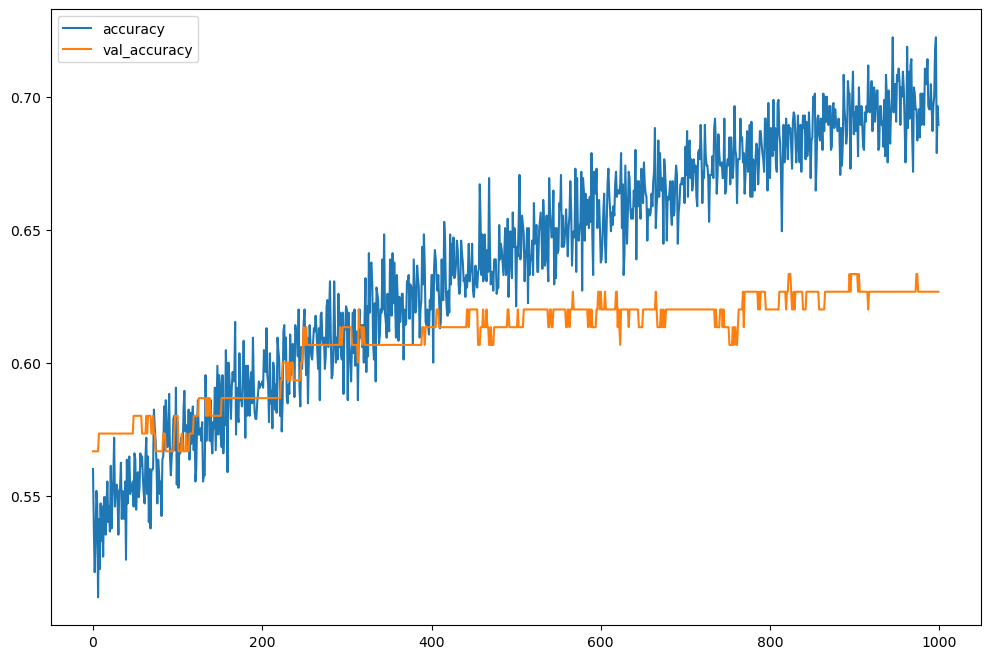

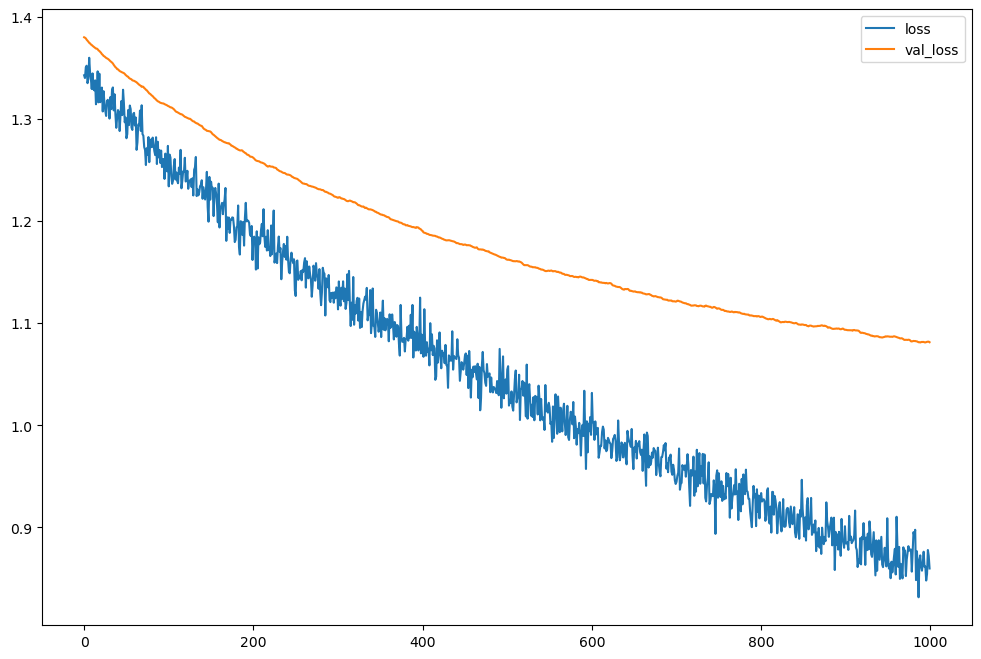

27/27 - 0s - 1ms/step - accuracy: 0.7576 - loss: 0.7473
5/5 - 0s - 3ms/step - accuracy: 0.6267 - loss: 1.0814
Training accuracy: 0.7576470375061035
Test accuracy: 0.6266666650772095


In [65]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()
train_loss, train_acc = model.evaluate(X_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print('Training accuracy:', train_acc)
print('Test accuracy:', test_acc)

Kaggle 4: https://www.kaggle.com/code/varreltantio/music-genre-feature-extraction-classification

In [67]:
scaler = StandardScaler()

X = dfWithGenresMappedToInts.iloc[:, :-1] 
y = dfWithGenresMappedToInts.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [70]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
seed = 12
tf.random.set_seed(seed)

TF version:- 2.16.1


In [76]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [77]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 256)            │        11,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,322 (208.29 KB)

 Trainable params: 53,322 (208.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1624 - loss: 2.2727 - val_accuracy: 0.3267 - val_loss: 1.9778
Epoch 2/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3977 - loss: 1.8697 - val_accuracy: 0.3867 - val_loss: 1.7218
Epoch 3/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4556 - loss: 1.5752 - val_accuracy: 0.4267 - val_loss: 1.5571
Epoch 4/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5332 - loss: 1.3680 - val_accuracy: 0.5267 - val_loss: 1.3991
Epoch 5/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6122 - loss: 1.1936 - val_accuracy: 0.6000 - val_loss: 1.2998
Epoch 6/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6540 - loss: 1.0543 - val_accuracy: 0.6200 - val_loss: 1.2638
Epoch 7/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6888 - loss: 0.9417 - val_accuracy: 0.6000 - val_loss: 1.2437
Epoch 8/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.8537 - val_accuracy: 0.6067 - val_loss: 1.2215
Ep

Max. Validation Accuracy 0.6666666865348816


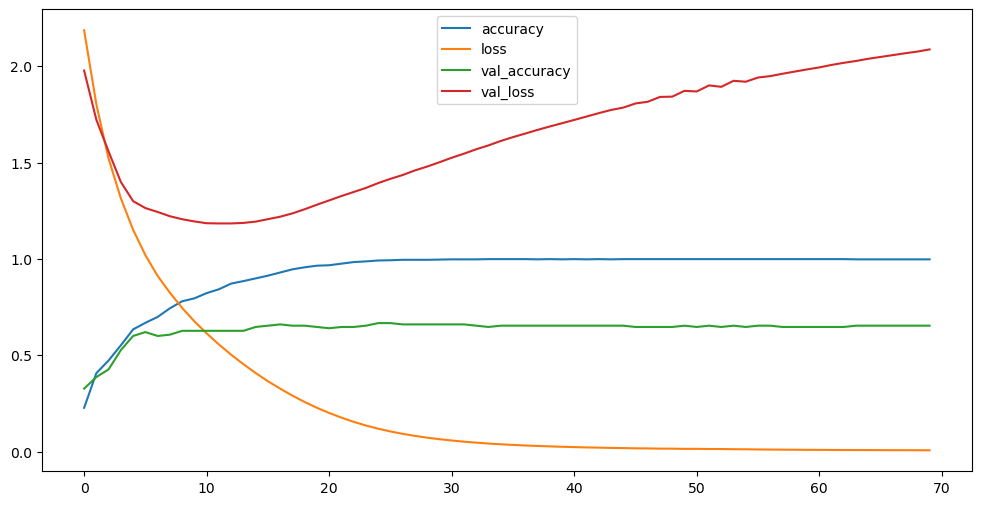

In [78]:
plotHistory(model_1_history)

In [79]:
model_1_history_2 = trainModel(model=model_1, epochs=200, optimizer='adam')

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9953 - loss: 0.0222 - val_accuracy: 0.6267 - val_loss: 2.1103
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.6267 - val_loss: 2.2388
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9939 - loss: 0.0169 - val_accuracy: 0.6467 - val_loss: 2.1515
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0124 - val_accuracy: 0.6400 - val_loss: 2.1925
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0090 - val_accuracy: 0.6467 - val_loss: 2.1799
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0079 - val_accuracy: 0.6467 - val_loss: 2.1523
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0065 - val_accuracy: 0.6333 - val_loss: 2.1749
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.6467 - val_loss: 2.2033

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0027 - val_accuracy: 0.6533 - val_loss: 2.8526
Epoch 104/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0032 - val_accuracy: 0.6533 - val_loss: 2.8587
Epoch 105/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0027 - val_accuracy: 0.6533 - val_loss: 2.8617
Epoch 106/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0032 - val_accuracy: 0.6533 - val_loss: 2.8675
Epoch 107/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0027 - val_accuracy: 0.6533 - val_loss: 2.8697
Epoch 108/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9983 - loss: 0.0031 - val_accuracy: 0.6533 - val_loss: 2.8752
Epoch 109/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9988 - loss: 0.0027 - val_accuracy: 0.6533 - val_loss: 2.8768
Epoch 110/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0031 - val_accuracy: 0.6533 - val_loss: 2.882

Epoch 154/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9971 - loss: 0.0028 - val_accuracy: 0.6467 - val_loss: 3.0301
Epoch 155/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9971 - loss: 0.0026 - val_accuracy: 0.6467 - val_loss: 3.0303
Epoch 156/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0028 - val_accuracy: 0.6467 - val_loss: 3.0334
Epoch 157/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0026 - val_accuracy: 0.6467 - val_loss: 3.0356
Epoch 158/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0028 - val_accuracy: 0.6467 - val_loss: 3.0388
Epoch 159/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0026 - val_accuracy: 0.6467 - val_loss: 3.0411
Epoch 160/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0027 - val_accuracy: 0.6467 - val_loss: 3.0442
Epoch 161/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0027 - val_accuracy: 0.6467 - v

Max. Validation Accuracy 0.6600000262260437


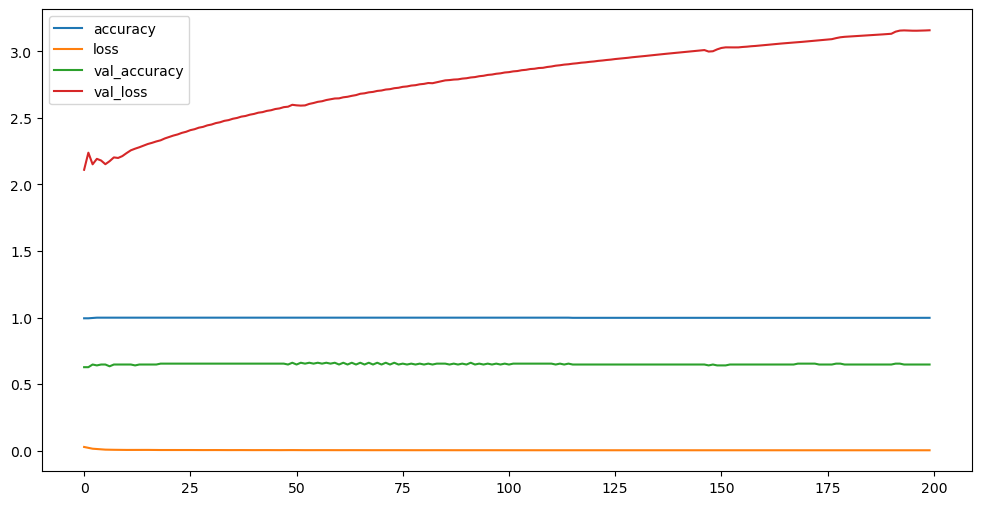

In [80]:
plotHistory(model_1_history_2)

In [81]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')

/Users/sayantanj/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 512)            │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,170 (766.29 KB)

 Trainable params: 196,170 (766.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1900 - loss: 2.2186 - val_accuracy: 0.3267 - val_loss: 1.9652
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3420 - loss: 1.9098 - val_accuracy: 0.4133 - val_loss: 1.6538
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3862 - loss: 1.6856 - val_accuracy: 0.4933 - val_loss: 1.4431
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4515 - loss: 1.5799 - val_accuracy: 0.5467 - val_loss: 1.3378
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4787 - loss: 1.4441 - val_accuracy: 0.5467 - val_loss: 1.2992
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5283 - loss: 1.3235 - val_accuracy: 0.5667 - val_loss: 1.2780
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5465 - loss: 1.2371 - val_accuracy: 0.6000 - val_loss: 1.2434
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5820 - loss: 1.1536 - val_accuracy: 0.5933 - val_loss:

Max. Validation Accuracy 0.699999988079071


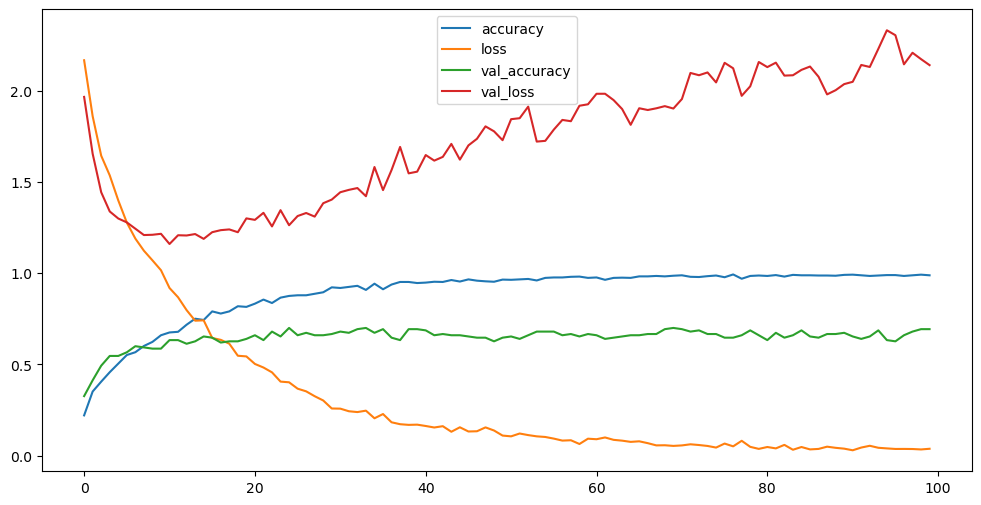

In [82]:
plotHistory(model_2_history)

In [83]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')

/Users/sayantanj/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 512)            │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,170 (766.29 KB)

 Trainable params: 196,170 (766.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0944 - loss: 2.3362 - val_accuracy: 0.1267 - val_loss: 2.2885
Epoch 2/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0983 - loss: 2.3096 - val_accuracy: 0.1533 - val_loss: 2.2785
Epoch 3/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0993 - loss: 2.3029 - val_accuracy: 0.1733 - val_loss: 2.2686
Epoch 4/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1297 - loss: 2.2767 - val_accuracy: 0.2000 - val_loss: 2.2592
Epoch 5/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1220 - loss: 2.2821 - val_accuracy: 0.2000 - val_loss: 2.2494
Epoch 6/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1638 - loss: 2.2522 - val_accuracy: 0.2200 - val_loss: 2.2387
Epoch 7/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1602 - loss: 2.2541 - val_accuracy: 0.2400 - val_loss: 2.2285
Epoch 8/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1706 - loss: 2.2443 - val_accuracy: 0.2400 - val_loss: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5033 - loss: 1.3860 - val_accuracy: 0.5267 - val_loss: 1.3495
Epoch 104/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4926 - loss: 1.3826 - val_accuracy: 0.5267 - val_loss: 1.3480
Epoch 105/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4918 - loss: 1.3589 - val_accuracy: 0.5200 - val_loss: 1.3445
Epoch 106/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5030 - loss: 1.3832 - val_accuracy: 0.5267 - val_loss: 1.3456
Epoch 107/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5144 - loss: 1.3546 - val_accuracy: 0.5200 - val_loss: 1.3434
Epoch 108/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4831 - loss: 1.3362 - val_accuracy: 0.5267 - val_loss: 1.3387
Epoch 109/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5175 - loss: 1.3531 - val_accuracy: 0.5267 - val_loss: 1.3346
Epoch 110/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 1.3698 - val_accuracy: 0.5267 - val_loss: 1.330

Epoch 154/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6011 - loss: 1.1386 - val_accuracy: 0.6000 - val_loss: 1.2503
Epoch 155/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5631 - loss: 1.1627 - val_accuracy: 0.6067 - val_loss: 1.2440
Epoch 156/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5967 - loss: 1.1461 - val_accuracy: 0.6000 - val_loss: 1.2426
Epoch 157/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5707 - loss: 1.2055 - val_accuracy: 0.5933 - val_loss: 1.2466
Epoch 158/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5930 - loss: 1.1460 - val_accuracy: 0.5933 - val_loss: 1.2403
Epoch 159/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6267 - loss: 1.0927 - val_accuracy: 0.5933 - val_loss: 1.2383
Epoch 160/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6104 - loss: 1.1203 - val_accuracy: 0.6000 - val_loss: 1.2377
Epoch 161/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5939 - loss: 1.1368 - val_accuracy: 0.6000 -

Epoch 205/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6527 - loss: 1.0010 - val_accuracy: 0.6067 - val_loss: 1.2048
Epoch 206/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6700 - loss: 0.9706 - val_accuracy: 0.6067 - val_loss: 1.1991
Epoch 207/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6525 - loss: 0.9935 - val_accuracy: 0.6133 - val_loss: 1.1945
Epoch 208/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6392 - loss: 0.9864 - val_accuracy: 0.6067 - val_loss: 1.2010
Epoch 209/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6382 - loss: 0.9651 - val_accuracy: 0.6067 - val_loss: 1.1988
Epoch 210/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6401 - loss: 0.9590 - val_accuracy: 0.6000 - val_loss: 1.2007
Epoch 211/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6486 - loss: 0.9779 - val_accuracy: 0.6067 - val_loss: 1.1953
Epoch 212/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6665 - loss: 0.9600 - val_accuracy: 0.6000 -

Epoch 256/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7144 - loss: 0.8455 - val_accuracy: 0.6400 - val_loss: 1.1942
Epoch 257/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7008 - loss: 0.8480 - val_accuracy: 0.6467 - val_loss: 1.1950
Epoch 258/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6745 - loss: 0.8969 - val_accuracy: 0.6267 - val_loss: 1.2011
Epoch 259/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7091 - loss: 0.8291 - val_accuracy: 0.6267 - val_loss: 1.1998
Epoch 260/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7257 - loss: 0.8387 - val_accuracy: 0.6267 - val_loss: 1.1971
Epoch 261/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7301 - loss: 0.8172 - val_accuracy: 0.6533 - val_loss: 1.1972
Epoch 262/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7071 - loss: 0.8403 - val_accuracy: 0.6467 - val_loss: 1.1927
Epoch 263/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.8112 - val_accuracy: 0.6533 

Epoch 307/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7465 - loss: 0.7372 - val_accuracy: 0.6467 - val_loss: 1.1961
Epoch 308/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7507 - loss: 0.6977 - val_accuracy: 0.6533 - val_loss: 1.1998
Epoch 309/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7670 - loss: 0.6943 - val_accuracy: 0.6467 - val_loss: 1.1972
Epoch 310/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7651 - loss: 0.7187 - val_accuracy: 0.6600 - val_loss: 1.1916
Epoch 311/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7541 - loss: 0.6801 - val_accuracy: 0.6467 - val_loss: 1.1951
Epoch 312/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7416 - loss: 0.7452 - val_accuracy: 0.6533 - val_loss: 1.1976
Epoch 313/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7608 - loss: 0.7044 - val_accuracy: 0.6467 - val_loss: 1.1904
Epoch 314/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7441 - loss: 0.7184 - val_accuracy: 0.6533 - v

Epoch 358/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7995 - loss: 0.6219 - val_accuracy: 0.6533 - val_loss: 1.2081
Epoch 359/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8016 - loss: 0.5990 - val_accuracy: 0.6600 - val_loss: 1.2100
Epoch 360/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7969 - loss: 0.5960 - val_accuracy: 0.6467 - val_loss: 1.2075
Epoch 361/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7909 - loss: 0.6125 - val_accuracy: 0.6600 - val_loss: 1.2126
Epoch 362/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7846 - loss: 0.6061 - val_accuracy: 0.6600 - val_loss: 1.2243
Epoch 363/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7843 - loss: 0.6106 - val_accuracy: 0.6533 - val_loss: 1.2215
Epoch 364/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8056 - loss: 0.5900 - val_accuracy: 0.6467 - val_loss: 1.2179
Epoch 365/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8006 - loss: 0.6036 - val_accuracy: 0.6533 - 

Epoch 409/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8246 - loss: 0.4987 - val_accuracy: 0.6667 - val_loss: 1.2475
Epoch 410/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8213 - loss: 0.5558 - val_accuracy: 0.6600 - val_loss: 1.2359
Epoch 411/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8227 - loss: 0.5362 - val_accuracy: 0.6800 - val_loss: 1.2365
Epoch 412/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8429 - loss: 0.4923 - val_accuracy: 0.6667 - val_loss: 1.2283
Epoch 413/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8259 - loss: 0.5579 - val_accuracy: 0.6733 - val_loss: 1.2240
Epoch 414/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8264 - loss: 0.5227 - val_accuracy: 0.6667 - val_loss: 1.2303
Epoch 415/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8524 - loss: 0.4880 - val_accuracy: 0.6600 - val_loss: 1.2288
Epoch 416/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8146 - loss: 0.5114 - val_accuracy: 0.6667 - v

Epoch 460/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8347 - loss: 0.4576 - val_accuracy: 0.6467 - val_loss: 1.2603
Epoch 461/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8546 - loss: 0.4411 - val_accuracy: 0.6667 - val_loss: 1.2656
Epoch 462/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8470 - loss: 0.4326 - val_accuracy: 0.6600 - val_loss: 1.2574
Epoch 463/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8491 - loss: 0.4219 - val_accuracy: 0.6600 - val_loss: 1.2591
Epoch 464/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8717 - loss: 0.4516 - val_accuracy: 0.6667 - val_loss: 1.2678
Epoch 465/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8615 - loss: 0.4026 - val_accuracy: 0.6600 - val_loss: 1.2642
Epoch 466/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8557 - loss: 0.4343 - val_accuracy: 0.6667 - val_loss: 1.2610
Epoch 467/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8460 - loss: 0.4425 - val_accuracy: 0.6667 - 

Epoch 511/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8652 - loss: 0.3660 - val_accuracy: 0.6667 - val_loss: 1.2886
Epoch 512/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8759 - loss: 0.4011 - val_accuracy: 0.6667 - val_loss: 1.2945
Epoch 513/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8656 - loss: 0.3932 - val_accuracy: 0.6533 - val_loss: 1.2987
Epoch 514/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8869 - loss: 0.3591 - val_accuracy: 0.6467 - val_loss: 1.3024
Epoch 515/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8857 - loss: 0.3753 - val_accuracy: 0.6467 - val_loss: 1.3055
Epoch 516/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8649 - loss: 0.3851 - val_accuracy: 0.6600 - val_loss: 1.2986
Epoch 517/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8873 - loss: 0.3684 - val_accuracy: 0.6467 - val_loss: 1.3074
Epoch 518/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8954 - loss: 0.3695 - val_accuracy: 0.6533 - v

Epoch 562/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8895 - loss: 0.3427 - val_accuracy: 0.6600 - val_loss: 1.3259
Epoch 563/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8901 - loss: 0.3355 - val_accuracy: 0.6600 - val_loss: 1.3338
Epoch 564/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9033 - loss: 0.3249 - val_accuracy: 0.6733 - val_loss: 1.3303
Epoch 565/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9178 - loss: 0.2934 - val_accuracy: 0.6600 - val_loss: 1.3235
Epoch 566/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8869 - loss: 0.3406 - val_accuracy: 0.6600 - val_loss: 1.3250
Epoch 567/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8844 - loss: 0.3360 - val_accuracy: 0.6533 - val_loss: 1.3287
Epoch 568/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9127 - loss: 0.2841 - val_accuracy: 0.6467 - val_loss: 1.3385
Epoch 569/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8936 - loss: 0.3499 - val_accuracy: 0.6467 - 

Epoch 613/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9276 - loss: 0.2449 - val_accuracy: 0.6667 - val_loss: 1.3676
Epoch 614/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9150 - loss: 0.2699 - val_accuracy: 0.6733 - val_loss: 1.3739
Epoch 615/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9065 - loss: 0.2800 - val_accuracy: 0.6600 - val_loss: 1.3804
Epoch 616/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9164 - loss: 0.2811 - val_accuracy: 0.6667 - val_loss: 1.3785
Epoch 617/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8996 - loss: 0.2765 - val_accuracy: 0.6800 - val_loss: 1.3701
Epoch 618/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9097 - loss: 0.2678 - val_accuracy: 0.6667 - val_loss: 1.3742
Epoch 619/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9256 - loss: 0.2618 - val_accuracy: 0.6600 - val_loss: 1.3715
Epoch 620/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9207 - loss: 0.2692 - val_accuracy: 0.6667 - v

Epoch 664/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9413 - loss: 0.2177 - val_accuracy: 0.6667 - val_loss: 1.4259
Epoch 665/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9375 - loss: 0.2327 - val_accuracy: 0.6600 - val_loss: 1.4325
Epoch 666/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9313 - loss: 0.2262 - val_accuracy: 0.6600 - val_loss: 1.4355
Epoch 667/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9355 - loss: 0.2138 - val_accuracy: 0.6467 - val_loss: 1.4464
Epoch 668/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9117 - loss: 0.2337 - val_accuracy: 0.6667 - val_loss: 1.4429
Epoch 669/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9188 - loss: 0.2609 - val_accuracy: 0.6667 - val_loss: 1.4303
Epoch 670/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9150 - loss: 0.2480 - val_accuracy: 0.6600 - val_loss: 1.4367
Epoch 671/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9259 - loss: 0.2429 - val_accuracy: 0.6600 - v

Max. Validation Accuracy 0.6800000071525574


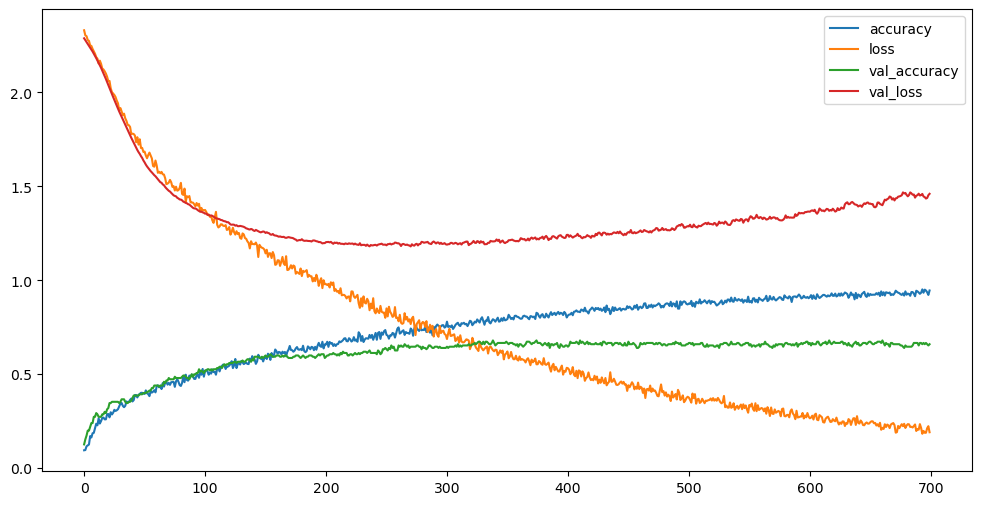

In [84]:
plotHistory(model_3_history)

In [85]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

/Users/sayantanj/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 1024)           │        46,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 744,010 (2.84 MB)

 Trainable params: 744,010 (2.84 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1453 - loss: 2.2710 - val_accuracy: 0.3467 - val_loss: 1.8523
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2993 - loss: 1.9426 - val_accuracy: 0.4733 - val_loss: 1.6977
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3591 - loss: 1.8063 - val_accuracy: 0.4533 - val_loss: 1.5361
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3836 - loss: 1.6635 - val_accuracy: 0.4800 - val_loss: 1.4526
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4370 - loss: 1.5592 - val_accuracy: 0.5200 - val_loss: 1.3714
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4593 - loss: 1.5034 - val_accuracy: 0.5133 - val_loss: 1.3625
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5161 - loss: 1.3957 - val_accuracy: 0.5267 - val_loss: 1.3829
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5266 - loss: 1.3607 - val_accuracy: 0.5400 - val_

Epoch 52/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9584 - loss: 0.1336 - val_accuracy: 0.6267 - val_loss: 2.1124
Epoch 53/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9591 - loss: 0.1565 - val_accuracy: 0.6267 - val_loss: 2.0795
Epoch 54/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9745 - loss: 0.1109 - val_accuracy: 0.6333 - val_loss: 2.2470
Epoch 55/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9546 - loss: 0.1438 - val_accuracy: 0.5933 - val_loss: 2.3610
Epoch 56/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9642 - loss: 0.1251 - val_accuracy: 0.6067 - val_loss: 2.3549
Epoch 57/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9591 - loss: 0.1292 - val_accuracy: 0.6267 - val_loss: 2.2446
Epoch 58/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9622 - loss: 0.1326 - val_accuracy: 0.6267 - val_loss: 2.2402
Epoch 59/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9646 - loss: 0.1280 - val_accuracy: 0.6067 - v

Epoch 103/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9859 - loss: 0.0363 - val_accuracy: 0.6400 - val_loss: 2.7190
Epoch 104/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9655 - loss: 0.1146 - val_accuracy: 0.6400 - val_loss: 2.8409
Epoch 105/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9900 - loss: 0.0473 - val_accuracy: 0.6733 - val_loss: 2.7105
Epoch 106/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9889 - loss: 0.0421 - val_accuracy: 0.6600 - val_loss: 2.7200
Epoch 107/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9853 - loss: 0.0493 - val_accuracy: 0.6600 - val_loss: 2.6094
Epoch 108/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9899 - loss: 0.0372 - val_accuracy: 0.6667 - val_loss: 2.7321
Epoch 109/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9742 - loss: 0.1457 - val_accuracy: 0.6800 - val_loss: 2.7575
Epoch 110/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9817 - loss: 0.0679 - val_accuracy: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9908 - loss: 0.0213 - val_accuracy: 0.6800 - val_loss: 2.9531
Epoch 204/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.6467 - val_loss: 3.1700
Epoch 205/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9946 - loss: 0.0118 - val_accuracy: 0.6333 - val_loss: 3.2265
Epoch 206/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9869 - loss: 0.0750 - val_accuracy: 0.6800 - val_loss: 2.8685
Epoch 207/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9910 - loss: 0.0581 - val_accuracy: 0.6400 - val_loss: 3.0380
Epoch 208/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9965 - loss: 0.0128 - val_accuracy: 0.6667 - val_loss: 3.3350
Epoch 209/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.6667 - val_loss: 3.0774
Epoch 210/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9977 - loss: 0.0101 - val_accuracy: 0.6467 - val_los

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9963 - loss: 0.0061 - val_accuracy: 0.6467 - val_loss: 3.8503
Epoch 304/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9951 - loss: 0.0202 - val_accuracy: 0.6400 - val_loss: 3.8071
Epoch 305/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9932 - loss: 0.0182 - val_accuracy: 0.6200 - val_loss: 4.1115
Epoch 306/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9912 - loss: 0.0236 - val_accuracy: 0.6600 - val_loss: 3.5939
Epoch 307/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9943 - loss: 0.0118 - val_accuracy: 0.6467 - val_loss: 3.9344
Epoch 308/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9989 - loss: 0.0163 - val_accuracy: 0.6800 - val_loss: 3.7182
Epoch 309/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9923 - loss: 0.0345 - val_accuracy: 0.6733 - val_loss: 3.9083
Epoch 310/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9951 - loss: 0.0240 - val_accuracy: 0.6600 - val_los

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9944 - loss: 0.0086 - val_accuracy: 0.6533 - val_loss: 3.6608
Epoch 404/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9924 - loss: 0.0467 - val_accuracy: 0.6533 - val_loss: 3.4995
Epoch 405/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9910 - loss: 0.0239 - val_accuracy: 0.6467 - val_loss: 3.5889
Epoch 406/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9883 - loss: 0.0222 - val_accuracy: 0.6333 - val_loss: 4.0679
Epoch 407/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9937 - loss: 0.0162 - val_accuracy: 0.6333 - val_loss: 4.0940
Epoch 408/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9947 - loss: 0.0128 - val_accuracy: 0.6467 - val_loss: 3.9163
Epoch 409/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9880 - loss: 0.0323 - val_accuracy: 0.6600 - val_loss: 4.1685
Epoch 410/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9944 - loss: 0.0113 - val_accuracy: 0.6667 - val_los

Max. Validation Accuracy 0.7133333086967468


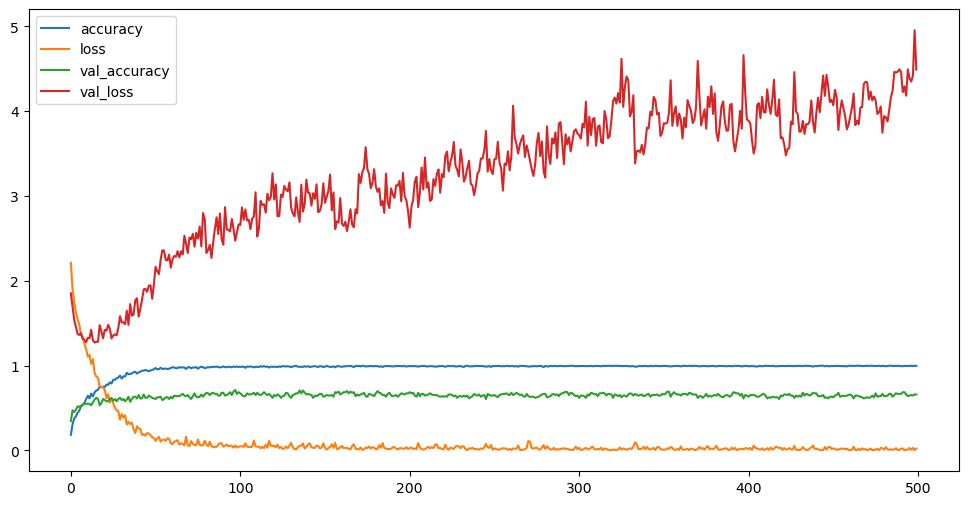

In [86]:
plotHistory(model_4_history)

In [88]:
testLoss1, testAcc1  = model_1.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",testLoss1)
print("The Best test Accuracy is :",testAcc1)


testLoss2, testAcc2 = model_2.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",testLoss2)
print("The Best test Accuracy is :",testAcc2)

testLoss3, testAcc3  = model_3.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",testLoss3)
print("The Best test Accuracy is :",testAcc3)


testLoss4, testAcc4  = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",testLoss4)
print("The Best test Accuracy is :",testAcc4)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6473 - loss: 3.1773 
The test Loss is : 3.1588733196258545
The Best test Accuracy is : 0.6466666460037231
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6862 - loss: 2.1509 
The test Loss is : 2.139085292816162
The Best test Accuracy is : 0.6933333277702332
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - loss: 1.4810 
The test Loss is : 1.4605745077133179
The Best test Accuracy is : 0.6600000262260437
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6535 - loss: 4.4767 
The test Loss is : 4.489253997802734
The Best test Accuracy is : 0.6600000262260437


Future step: Exporting audio files from youtube videos using youtube_dl library

Kaggle 5: https://www.kaggle.com/code/isotr0py/cnn-music-genre-classification

In [101]:
from keras import layers


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(32, kernel_size=(3, 1), use_bias=50))
model.add(Conv2D(32, kernel_size=(3, 1), use_bias=50))
# model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

'''

model = models.Sequential()
model.add(layers.Conv2D(20, (5, 5), activation="relu", strides=1, padding="valid"))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv2D(32,3,activation='relu'))
model.add(layers.Conv2D(16,3,activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
'''

/Users/sayantanj/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 42, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 21, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 19, 1, 32)      │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 17, 1, 32)      │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │         5,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,786 (46.04 KB)

 Trainable params: 11,786 (46.04 KB)

 Non-trainable params: 0 (0.00 B)

'\n\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(20, (5, 5), activation="relu", strides=1, padding="valid"))\nmodel.add(layers.MaxPooling1D(pool_size=2))\nmodel.add(layers.Conv2D(32,3,activation=\'relu\'))\nmodel.add(layers.Conv2D(16,3,activation=\'relu\'))\nmodel.add(layers.GlobalAveragePooling1D())\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(10, activation=\'softmax\'))\nmodel.compile(optimizer=\'adam\',loss=\'sparse_categorical_crossentropy\',metrics=[\'accuracy\'])\nmodel.summary()\n'

In [102]:
history = model.fit(X_train,y_train,epochs=40,batch_size=32)
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)
predictions = model.predict(X_test)

Epoch 1/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2012 - loss: 2.1764 
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4288 - loss: 1.6129 
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4761 - loss: 1.4022 
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 1.2958 
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5532 - loss: 1.2018 
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5963 - loss: 1.1177 
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 1.0440 
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.9812 
Epoch 9/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6532 - loss: 0.9278
Epoch 10/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - loss: 0.8812 
Epoch 11/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6973 - loss: 0.8394
Epoch 12/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

[5 7 7 6 4 6 4 4 6 1 8 0 4 9 7 8 2 3 7 3 5 1 3 5 2 7 1 9 9 6 3 8 6 9 9 6 6
 5 9 0 3 0 8 9 2 6 9 6 4 6 5 8 3 5 0 4 6 8 6 8 2 0 4 6 6 2 6 8 0 5 1 4 5 7
 4 7 7 0 5 3 3 0 6 0 3 5 9 2 6 3 9 4 3 2 7 4 7 0 7 0 2 3 9 2 7 7 5 9 1 4 5
 8 7 8 6 4 1 9 4 2 8 0 4 2 7 5 5 3 8 6 5 8 2 9 9 0 1 8 0 0 0 8 0 2 4 9 8 7
 6 3]


Text(95.72222222222221, 0.5, 'Real')

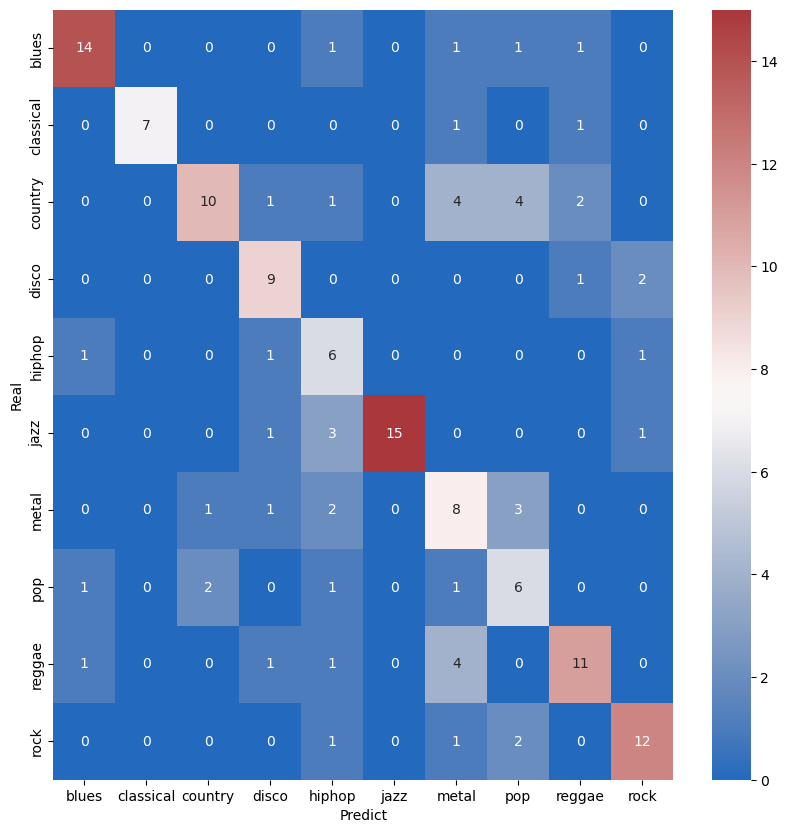

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


classlist = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
y_preds = np.argmax(predictions,axis=1)
print(y_preds)

matrix = confusion_matrix(y_test,y_preds)


plt.figure(figsize=[10,10])
sns.heatmap(matrix,cmap='vlag',annot=True,xticklabels=classlist,yticklabels=classlist)
plt.xlabel('Predict')
plt.ylabel('Real')